In [2]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/content/sequence_ecoli.fasta'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [23]:
!pip install nglview
!pip install Bio
!pip install colorama
!pip install seaborn
import Bio
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
from Bio import AlignIO
from Bio.pairwise2 import format_alignment
from Bio.Align import MultipleSeqAlignment
from Bio.Blast import NCBIWWW
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.Data import CodonTable
import nglview as nv
import matplotlib.pyplot as plt
%matplotlib inline
from colorama import Back, Style, Fore
import seaborn as sns
import pandas as pd


In [7]:
import os
fn = r'/sequence_ecoli.fasta'
os.path.exists(fn)

True

In [9]:
for record in SeqIO.parse("/sequence_ecoli.fasta", "fasta"):
    print(record.id)

AY893111.1


In [10]:
ncov_record = SeqIO.read("/sequence_ecoli.fasta", "fasta")
ncov_record

SeqRecord(seq=Seq('ATGGGGAAGATGGCAGCGGCCGTGGGCTCTGTGGCGACTCTGGCGACTGAGCCC...TTG'), id='AY893111.1', name='AY893111.1', description='AY893111.1 Synthetic construct Homo sapiens clone FLH119406.01L alkB, alkylation repair-like (E. coli) mRNA, partial cds', dbxrefs=[])

In [11]:
ncov_dna = ncov_record.seq
ncov_dna

Seq('ATGGGGAAGATGGCAGCGGCCGTGGGCTCTGTGGCGACTCTGGCGACTGAGCCC...TTG')

In [12]:
def ten_nucleotide_seq(genome):
    genes = []
    for ix, char in enumerate(genome):
        if ix != 0 and ix%10 == 0:
            genes.append(' ')
        genes.append(char)
    return ''.join(genes)

# color code to represent genome sequences
nu_clr_switcher = {
    # standard color-codes
    'A': Back.GREEN,
    'C': Back.YELLOW,
    'G': Back.RED,
    'T': Back.BLUE,
    ' ': Style.RESET_ALL
}
protein_clr_switcher = {
    # color-code by proteinfamily's polarity
    'A': Back.BLUE,
    'V': Back.BLUE,
    'I': Back.BLUE,
    'L': Back.BLUE,
    'M': Back.BLUE,
    'F': Back.BLUE,
    'Y': Back.CYAN,
    'W': Back.BLUE,
    'H': Back.CYAN,
    'R': Back.RED,
    'K': Back.RED,
    'N': Back.GREEN,
    'Q': Back.GREEN,
    'E': Back.MAGENTA,
    'D': Back.MAGENTA,
    'S': Back.GREEN,
    'T': Back.GREEN,
    'G': Back.YELLOW,
    'P': Back.YELLOW,
    'C': Back.BLUE,
    ' ': Style.RESET_ALL
}
def seq_repr(genome_str, strand ='dna'):
    if strand == 'dna':
        genome_str = ten_nucleotide_seq(genome=genome_str)
        line_break_cntr = 0
        for i in range(len(genome_str)):
            if genome_str[i] == ' ':
                line_break_cntr += 1
                if line_break_cntr>0 and line_break_cntr%6==0:
                    text = "\n"
                else:
                    text = nu_clr_switcher[genome_str[i]] + genome_str[i]
            else:
                text = nu_clr_switcher[genome_str[i]] + genome_str[i]
            print(text, end="")
        Style.RESET_ALL
    if strand == 'protein':
        for i in range(len(genome_str)):
            if genome_str[i] in protein_clr_switcher:
                if genome_str[i] == 'S' and genome_str[i+1:i+4] == 'TOP':
                    text = Style.RESET_ALL + 'S'
                elif genome_str[i] == 'T' and genome_str[i-1] == 'S' and genome_str[i+1:i+3] == 'OP':
                    text = Style.RESET_ALL + 'T'
                elif genome_str[i] == 'P' and genome_str[i-3:i] == 'STO':
                    text = Style.RESET_ALL + 'P'
                else:
                    text = protein_clr_switcher[genome_str[i]] + genome_str[i]
            else:
                Style.RESET_ALL
                text = genome_str[i]
            print(text, end="")

In [13]:
print("DNA sequence: ")
seq_repr(genome_str=ncov_dna, strand='dna')

DNA sequence: 
ATGGGGAAGA TGGCAGCGGC CGTGGGCTCT GTGGCGACTC TGGCGACTGA GCCCGGGGAG
GACGCCTTTC GGAAACTTTT CCGCTTCTAC CGTCAGAGCC GGCCCGGGAC CGCAGACCTG
GAAGGGGTCA TCGACTTCTC GGCGGCCCAC GCAGCCCGTG GCAAGGGTCC TGGTGCCCAA
AAGGTGATCA AATCTCAGCT AAATGTGTCT TCTGTCAGTG AGCAGAATGC ATATAGAGCA
GGTCTTCAGC CCGTCAGCAA GTGGCAAGCC TATGGACTCA AAGGCTATCC TGGGTTTATT
TTTATCCCAA ACCCCTTCCT CCCAGGTTAC CAGTGGCACT GGGTGAAACA GTGCCTTAAG
TTATATTCCC AGAAACCTAA TGTATGTAAC CTGGACAAAC ACATGTCTAA AGAAGAGACC
CAAGATCTGT GGGAACAGAG CAAAGAGTTC CTGAGGTATA AAGAAGCGAC TAAACGGAGA
CCCCGAAGTT TACTGGAGAA ACTGCGTTGG GTGACCGTAG GCTACCATTA TAACTGGGAC
AGTAAGAAAT ACTCAGCAGA TCATTACACA CCTTTCCCTT CTGACCTGGG TTTCCTCTCA
GAGCAAGTAG CCGCTGCCTG TGGATTTGAG GATTTCCGAG CTGAAGCAGG GATCCTGAAT
TACTACCGCC TGGACTCCAC ACTGGGAATC CACGTAGACA GATCTGAGCT AGATCACTCC
AAACCCTTGC TGTCATTCAG CTTTGGACAG TCCGCCATCT TTCTCCTGGG TGGTCTTCAA
AGGGATGAGG CCCCCACGGC CATGTTTATG CACAGTGGTG ACATCATGAT AATGTCGGGT
TTCAGCCGCC TCTTGAACCA CGCAGTCCCT CGTGTCCTTC CAAATCCAGA AGGGGA

In [14]:
len(ncov_dna)

1170

In [15]:
def nucleotides_composition(seq):
    nucleotides = {'A': 0, 'C': 0, 'G': 0, 'T': 0}
    for n in nucleotides:
        nucleotides[n] = seq.count(n)/len(seq)*100
    return nucleotides

In [16]:
ndict=nucleotides_composition(ncov_dna)
ndict

{'A': 25.128205128205128,
 'C': 26.581196581196583,
 'G': 25.8974358974359,
 'T': 22.393162393162395}

<ipython-input-41-910a50168fd4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Nucleotide", y="Composition", data=ndf, palette=custom_colors)


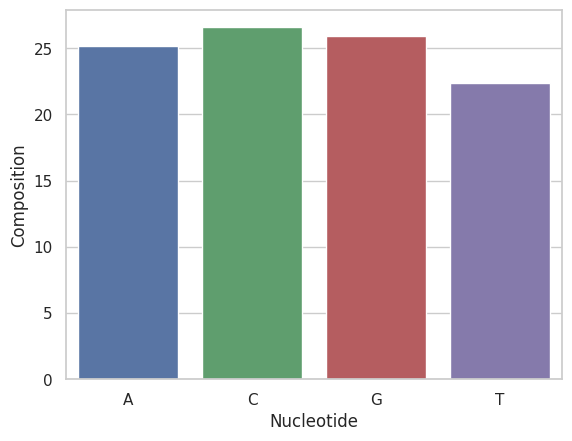

In [41]:
import pandas as pd
ndf = pd.DataFrame.from_dict(ndict, orient ='index')
ndf = ndf.reset_index()
ndf = ndf.rename(columns={"index": "Nucleotide", 0: "Composition"})
sns.set(style="whitegrid")
custom_colors = ["#4c72b0", "#55a868", "#c44e52", "#8172b3"]
ax = sns.barplot(x="Nucleotide", y="Composition", data=ndf, palette=custom_colors)
plt.show()

In [26]:
!pip install biopython
from Bio.SeqUtils import gc_fraction
from Bio.Seq import Seq # Import the Seq object

# Assuming ncov_dna is a string
ncov_dna = ncov_dna# Example sequence, replace with yours

print(f"GC% :{gc_fraction(ncov_dna)}") # Call the correct function

GC% :0.68


In [27]:
# tri-nucleotide compositions
trimers = ["AAA", "AAC", "AAG", "AAT", "ACA", "ACC", "ACG", "ACT", "AGA", "AGC", "AGG", "ATA", "ATC", "ATG", "CAA",
           "CAC", "CAG", "CCA","CCC","CCG","CGA","CGC","CTA","CTC","GAA","GAC","GCA","GCC","GGA","GTA","TAA","TCA"]

def trimer_composition(genome):
    trimer_dict = dict()
    for trimer in trimers:
        trimer_dict[trimer] = genome.count(trimer)
    return trimer_dict

In [28]:
composition = trimer_composition(ncov_dna)
total_composition = sum(composition.values())
norm_freq = [count/total_composition for count in composition.values()]
print(composition)
print(total_composition)
print(norm_freq)

{'AAA': 0, 'AAC': 0, 'AAG': 1, 'AAT': 0, 'ACA': 0, 'ACC': 0, 'ACG': 0, 'ACT': 0, 'AGA': 1, 'AGC': 1, 'AGG': 0, 'ATA': 0, 'ATC': 0, 'ATG': 2, 'CAA': 0, 'CAC': 0, 'CAG': 1, 'CCA': 0, 'CCC': 0, 'CCG': 1, 'CGA': 0, 'CGC': 0, 'CTA': 0, 'CTC': 0, 'GAA': 1, 'GAC': 0, 'GCA': 1, 'GCC': 1, 'GGA': 1, 'GTA': 0, 'TAA': 0, 'TCA': 0}
11
[0.0, 0.0, 0.09090909090909091, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09090909090909091, 0.09090909090909091, 0.0, 0.0, 0.0, 0.18181818181818182, 0.0, 0.0, 0.09090909090909091, 0.0, 0.0, 0.09090909090909091, 0.0, 0.0, 0.0, 0.0, 0.09090909090909091, 0.0, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.0, 0.0, 0.0]


In [29]:
tri = pd.DataFrame.from_dict(composition, orient ='index')
tri = tri.reset_index()
tri = tri.rename(columns={"index": "trimer", 0: "count"})

In [30]:
r1 = tri.sort_values(by='count', ascending=False)
r1.style.bar(subset=["count"],color='#').background_gradient(cmap='Reds')

,trimer,count
13,ATG,2
16,CAG,1
27,GCC,1
24,GAA,1
8,AGA,1
26,GCA,1
9,AGC,1
28,GGA,1
2,AAG,1
19,CCG,1


<ipython-input-42-05a1be29f95b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="trimer", ax=ax, data=tri, palette="bright")


<Axes: xlabel='count', ylabel='trimer'>

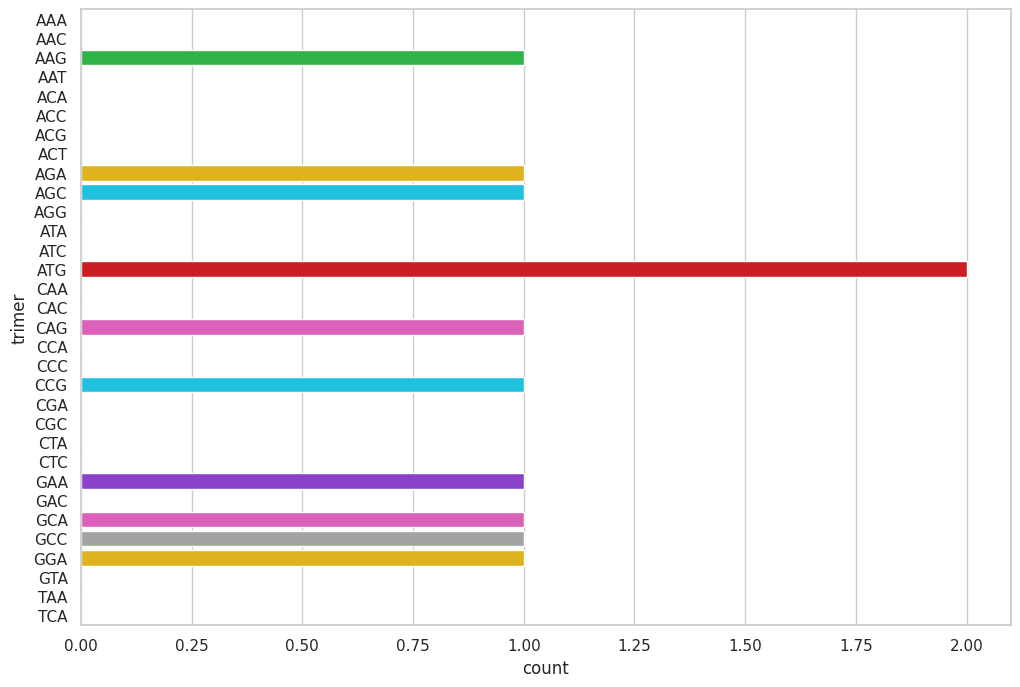

In [42]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="count", y="trimer", ax=ax, data=tri, palette="bright")